In [2]:
from fetch_dataframe_from_server import fetch_dataframe_from_server
from matplotlib import pyplot as plt

In [3]:
sql_statement = """ SELECT scenario_name, approach, metric, impact_factor, ranking_error, borda_score, stopping_criteria, AVG(result) AS result FROM `mu_ablation_study`
					WHERE approach like 'BinaryDecisionTree%'
					GROUP BY scenario_name, approach, metric, impact_factor, ranking_error, borda_score, stopping_criteria"""
    
df = fetch_dataframe_from_server(sql_statement)

c:\Users\I3lac\Desktop\BachelorThesisAnalysis\evalaution_environment\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


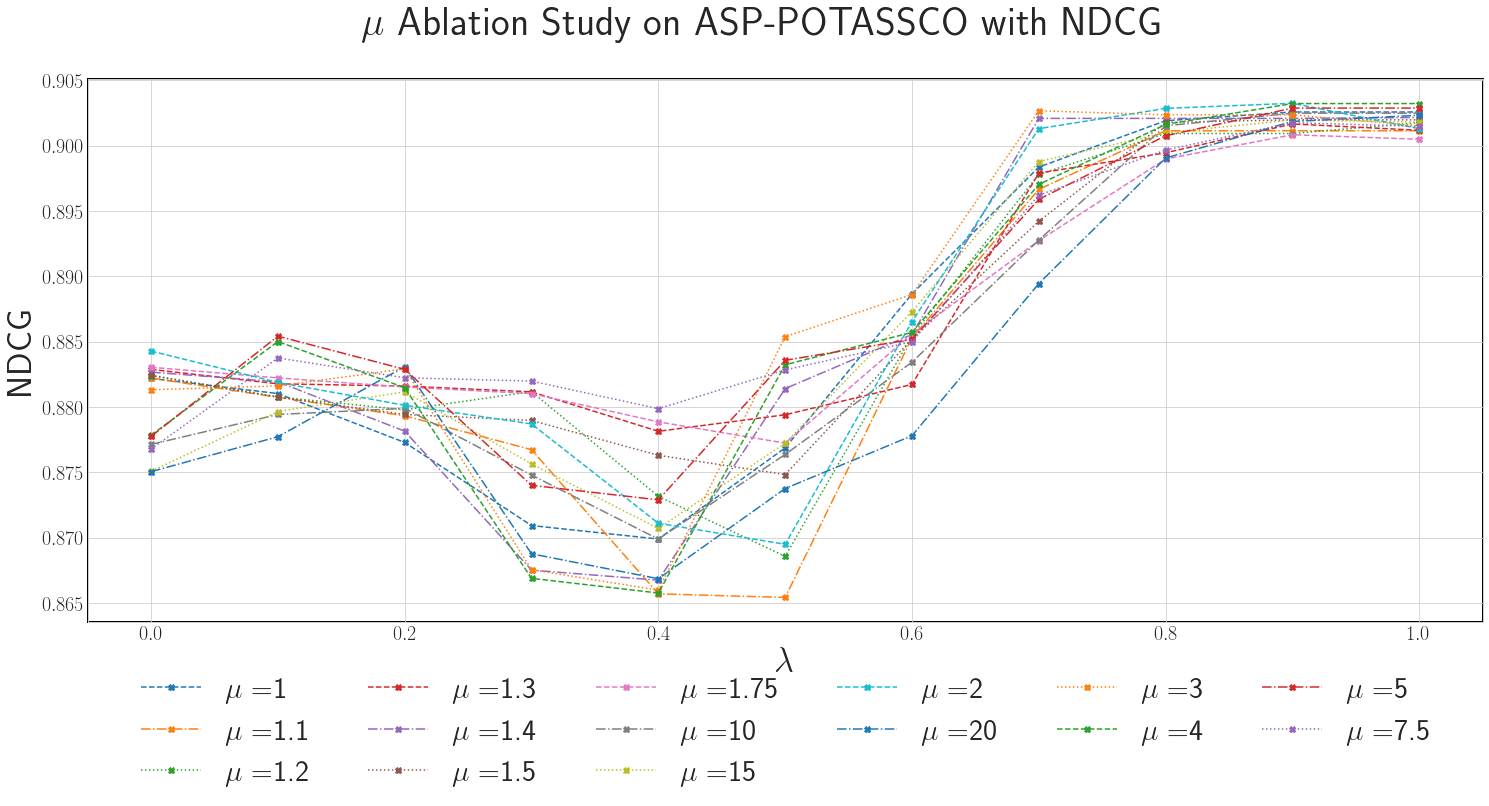

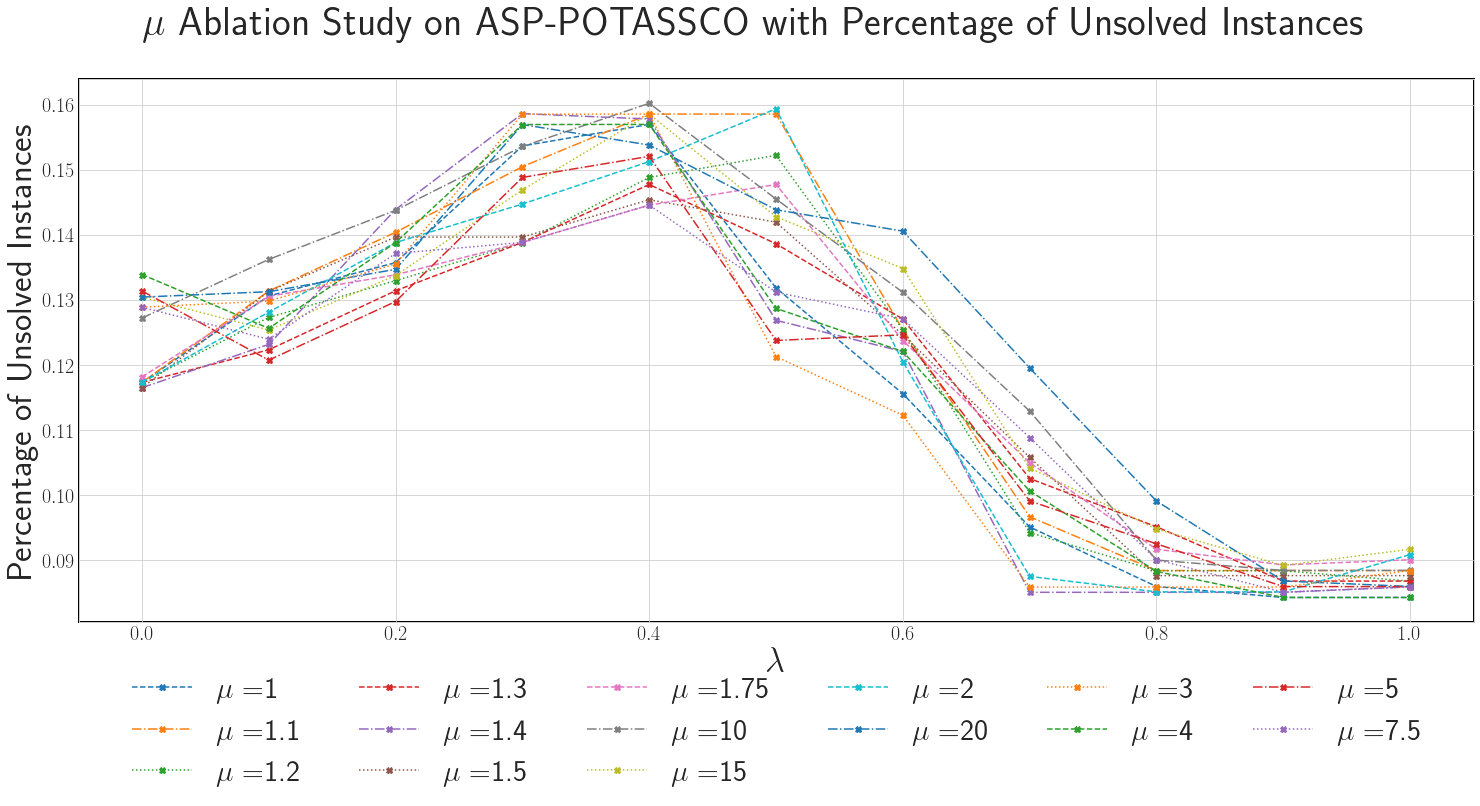

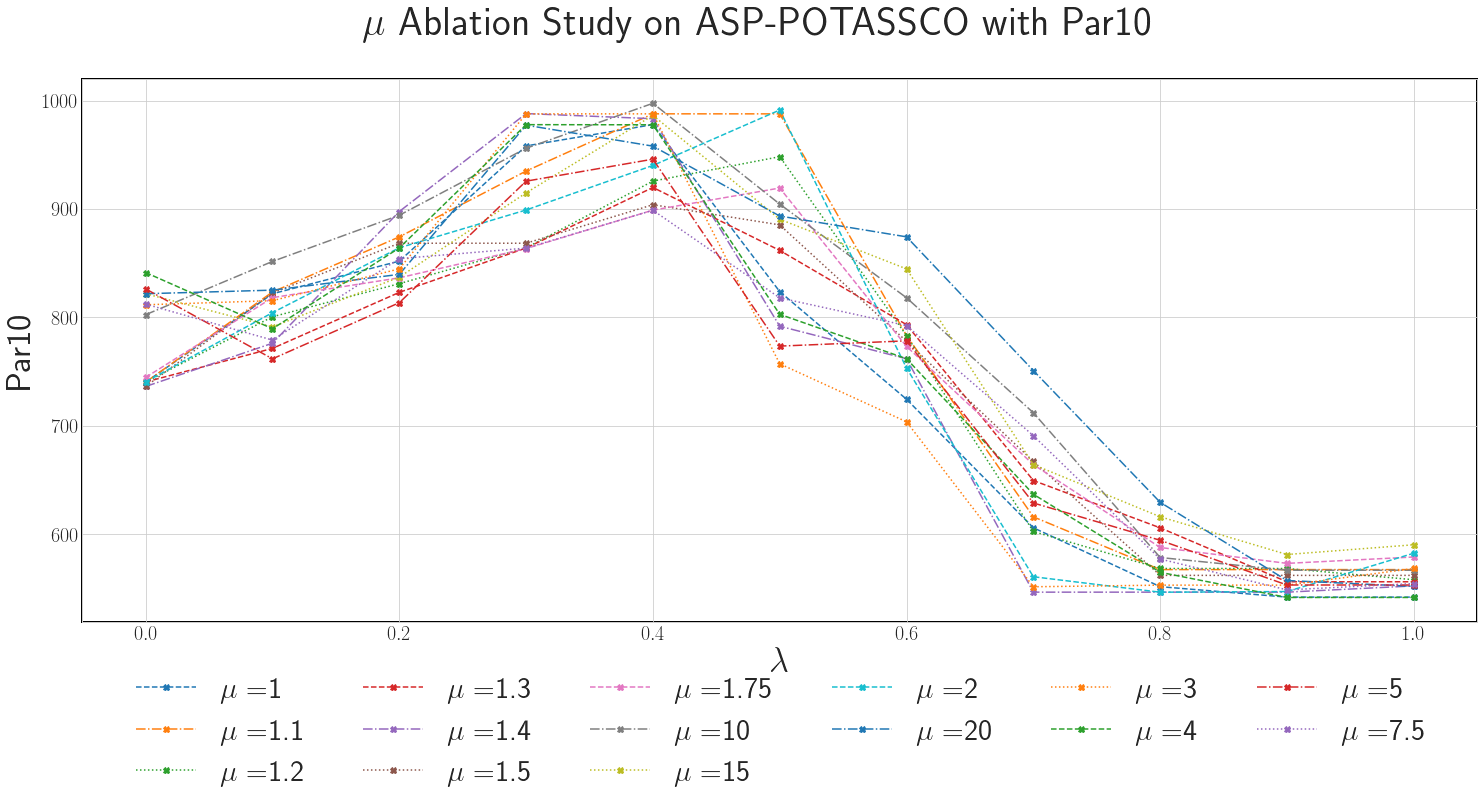

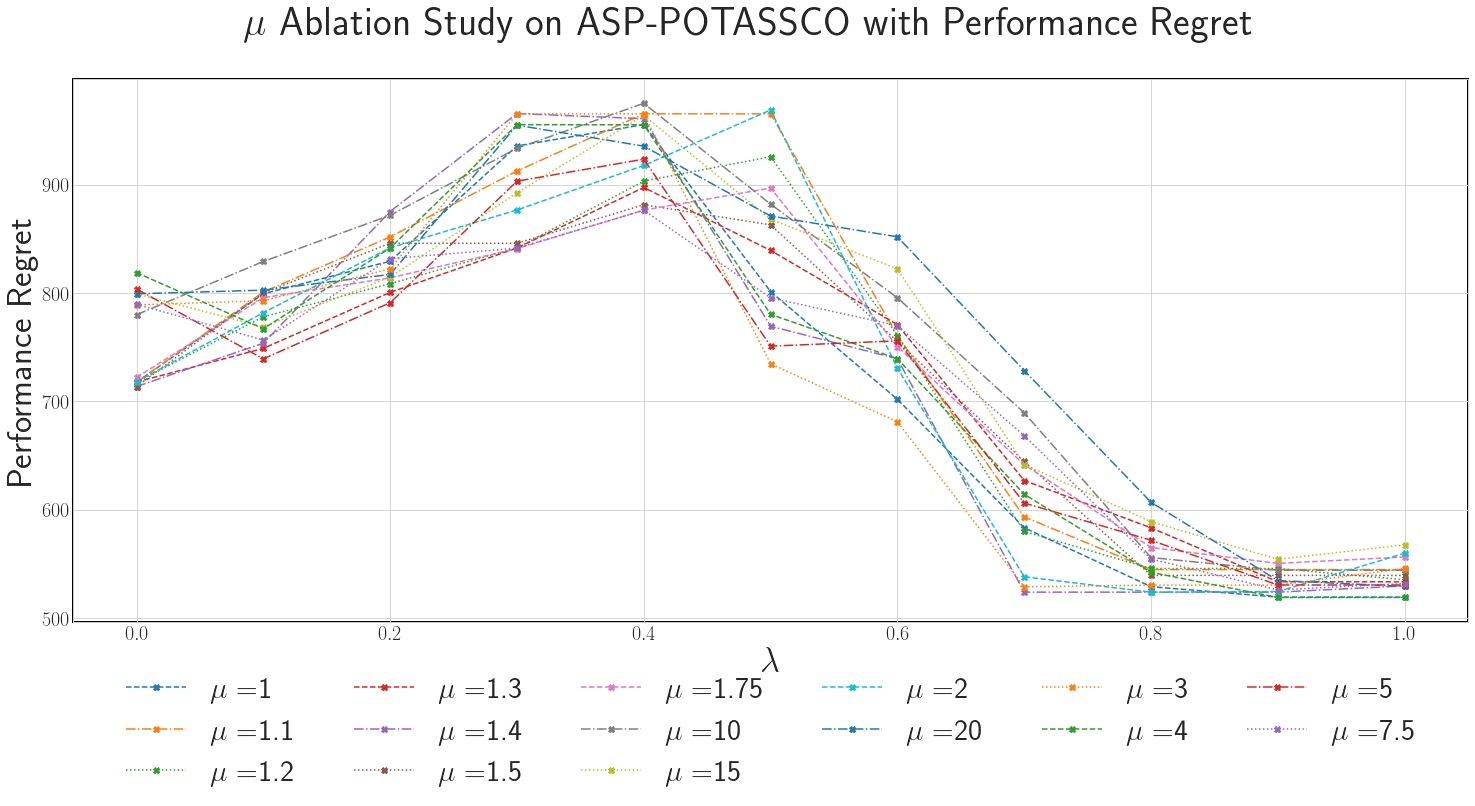

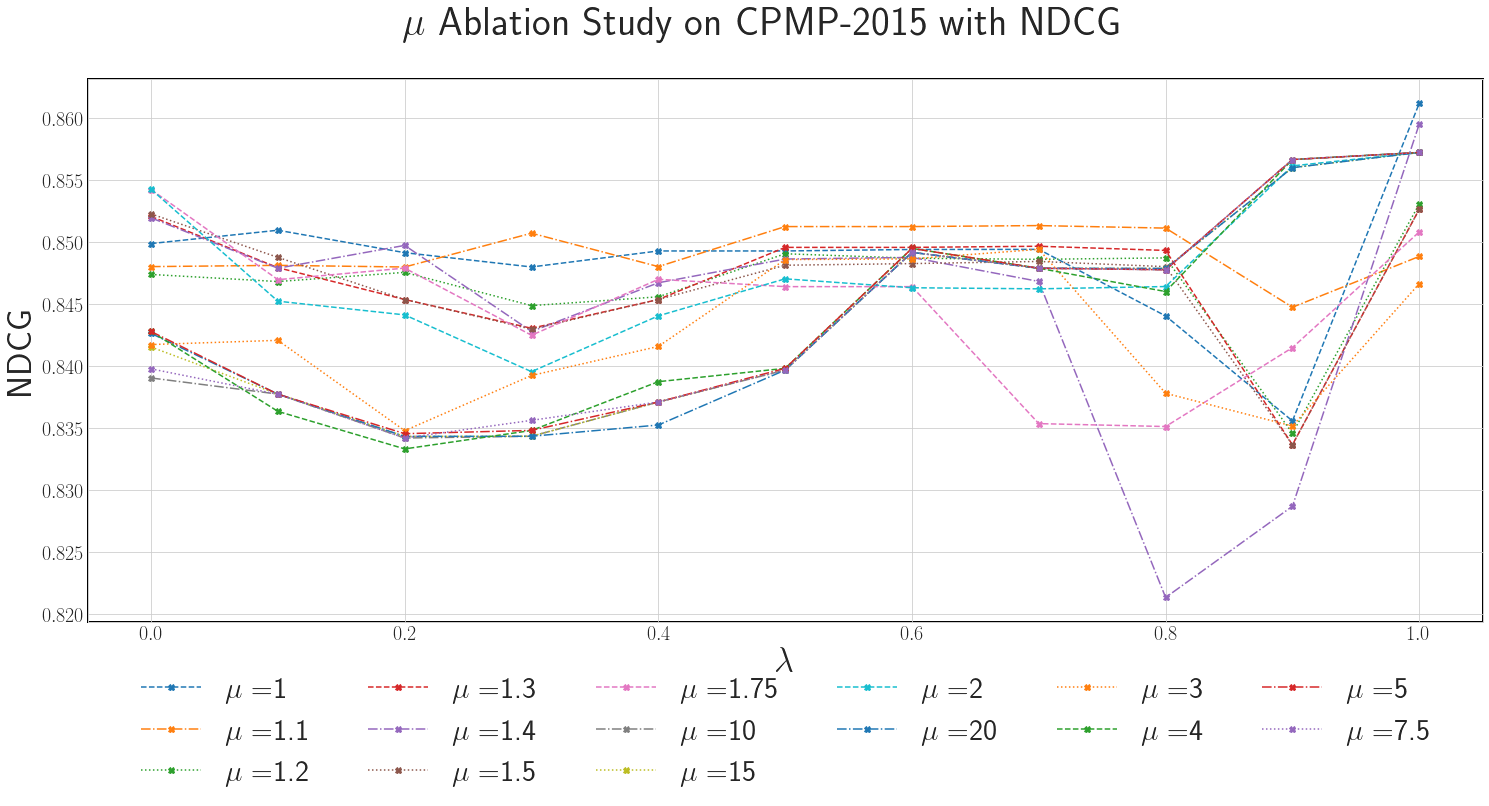

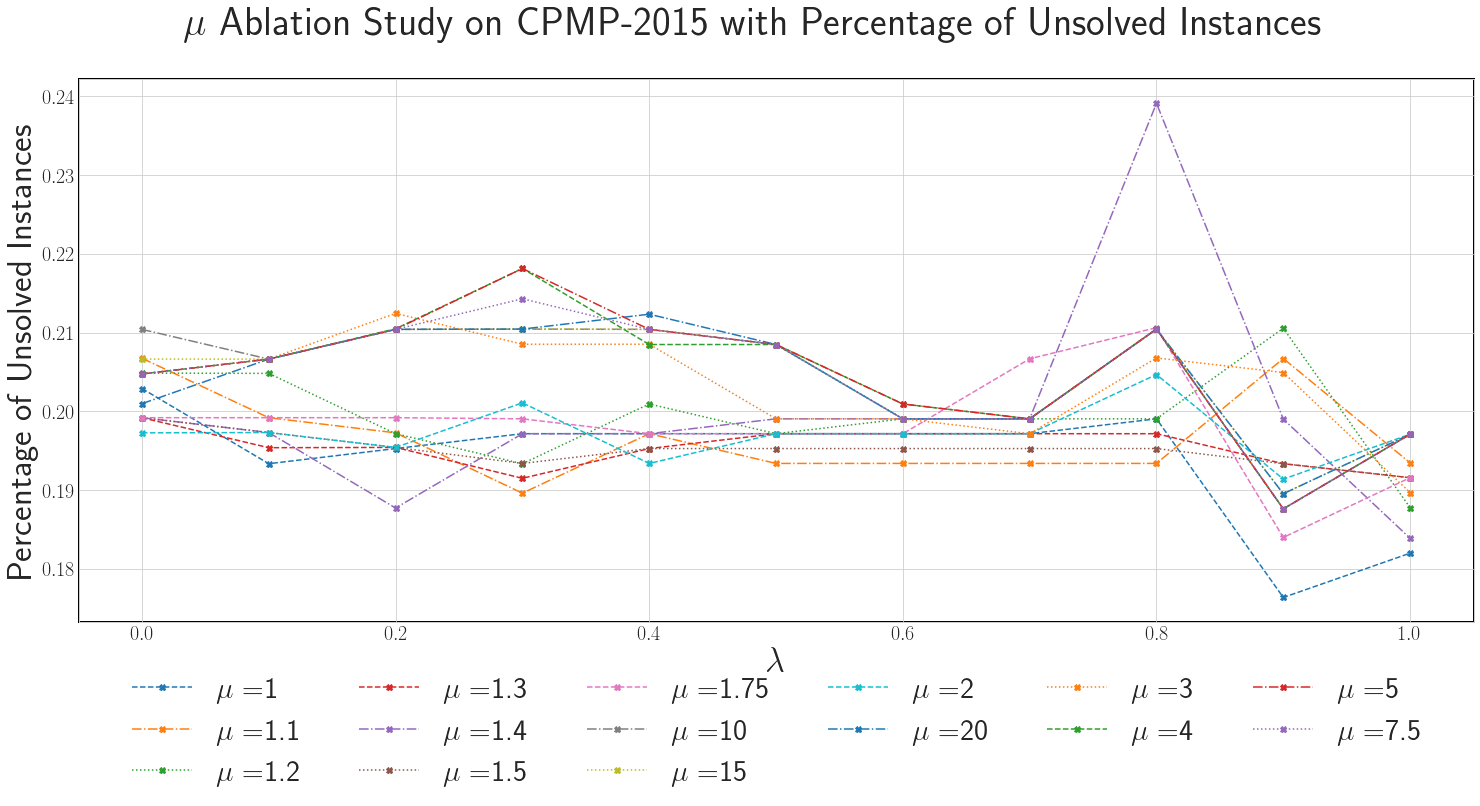

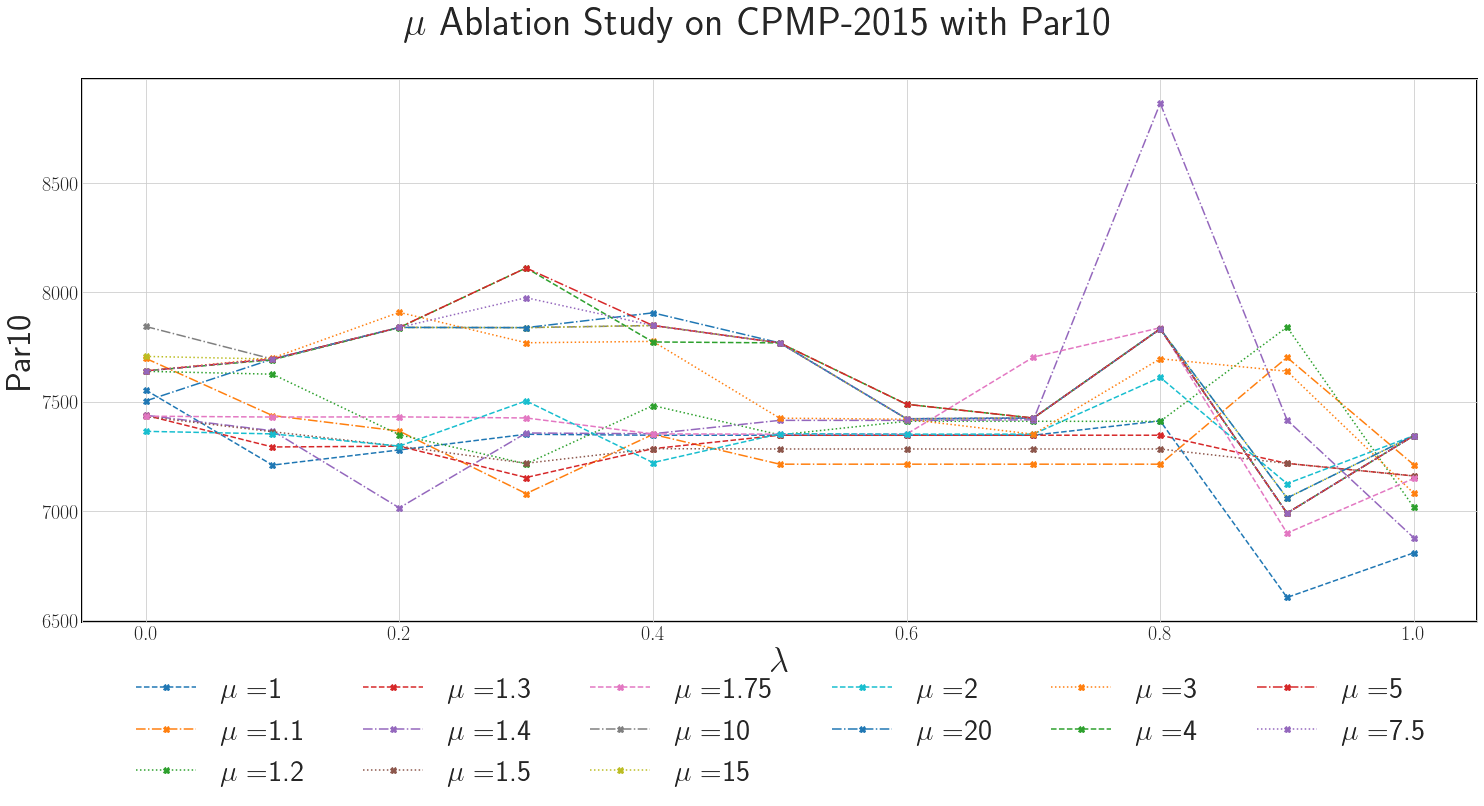

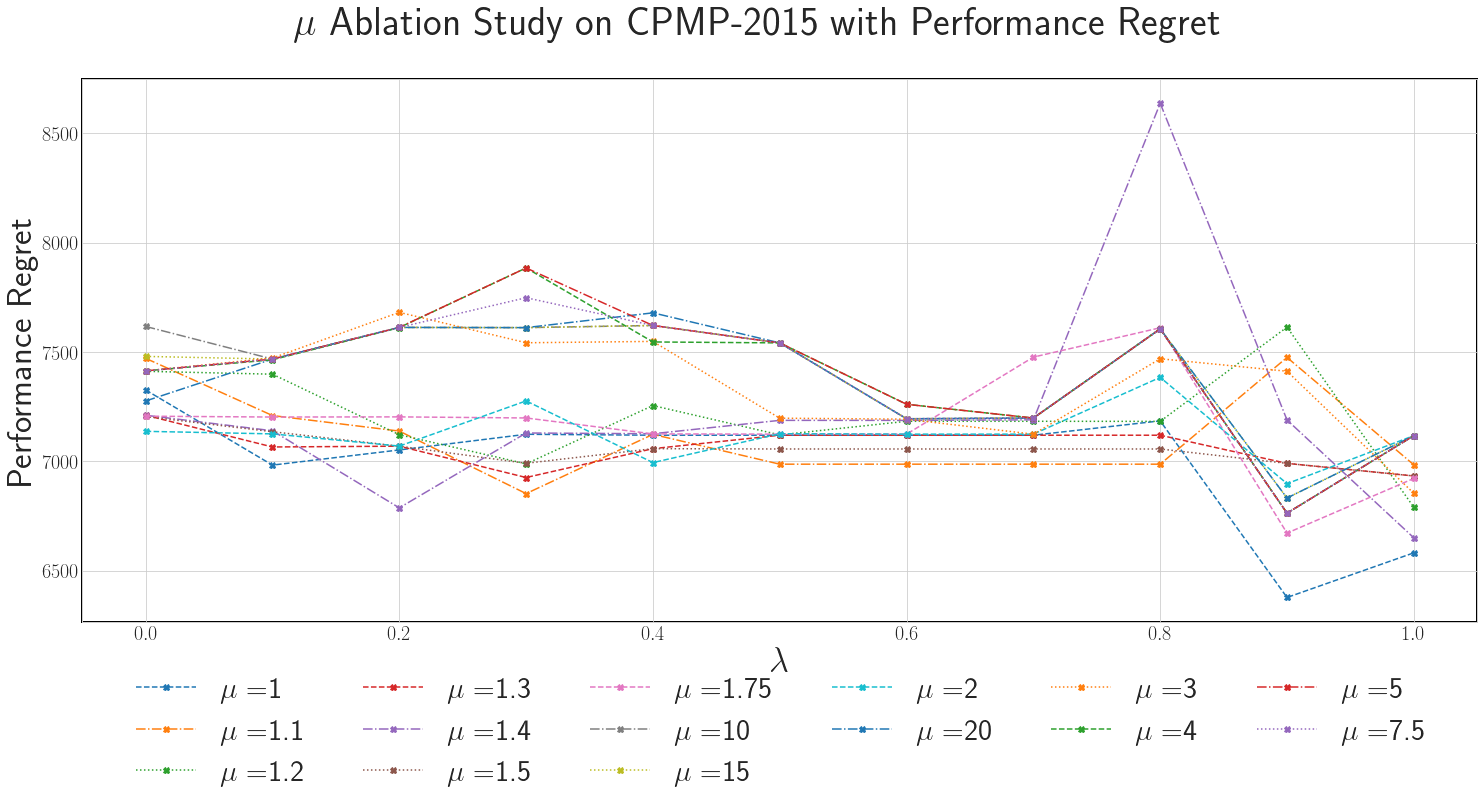

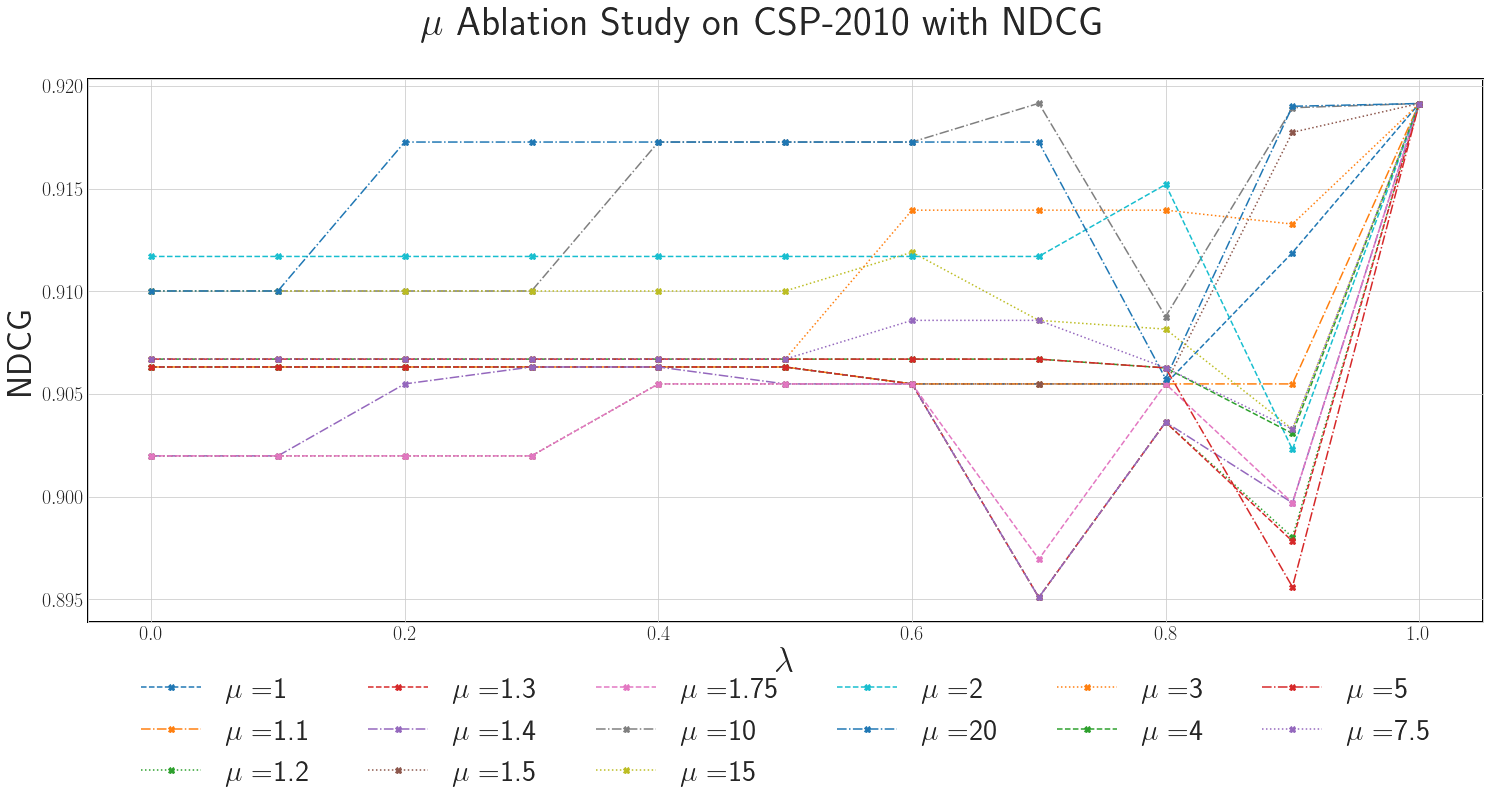

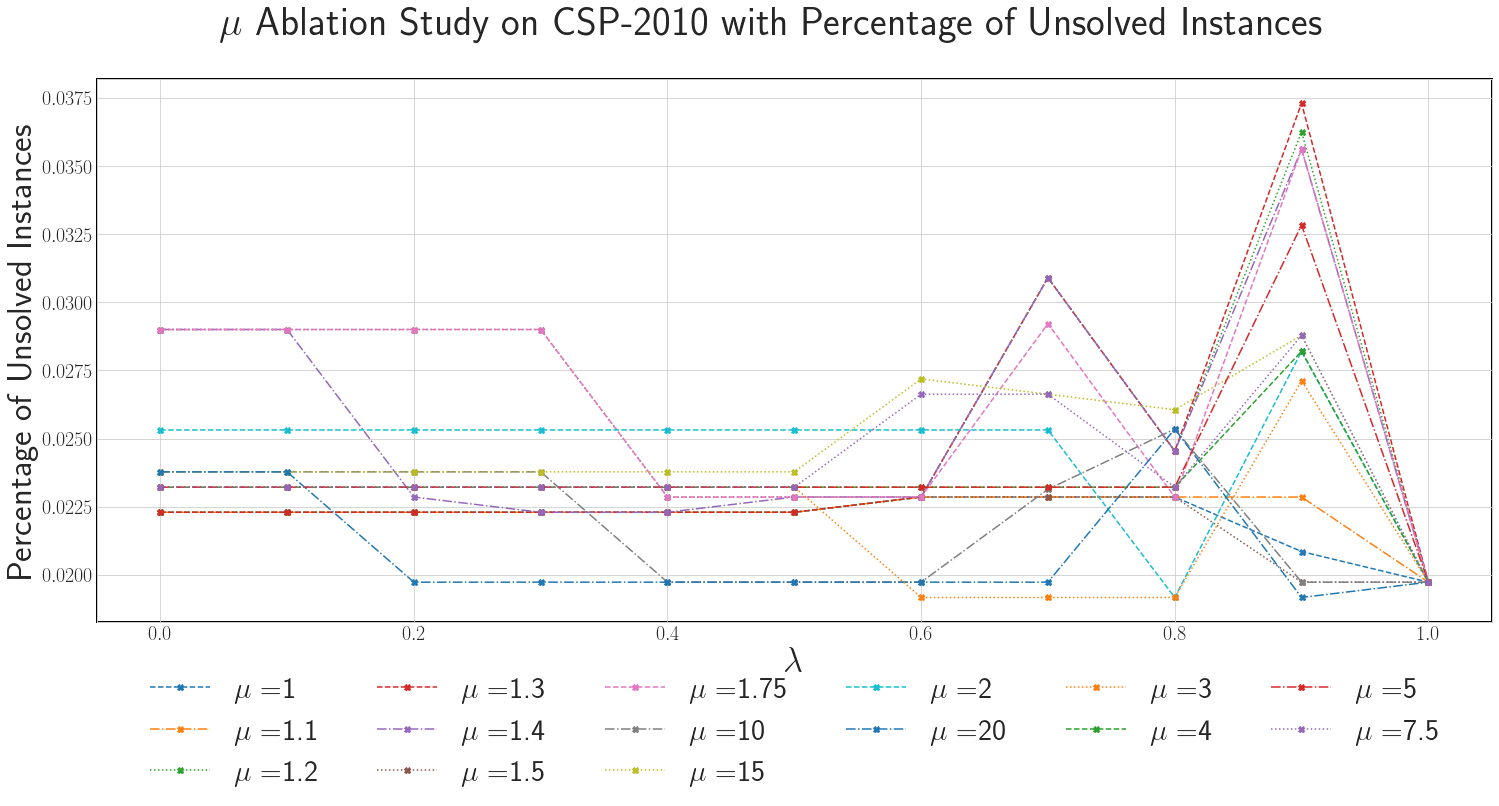

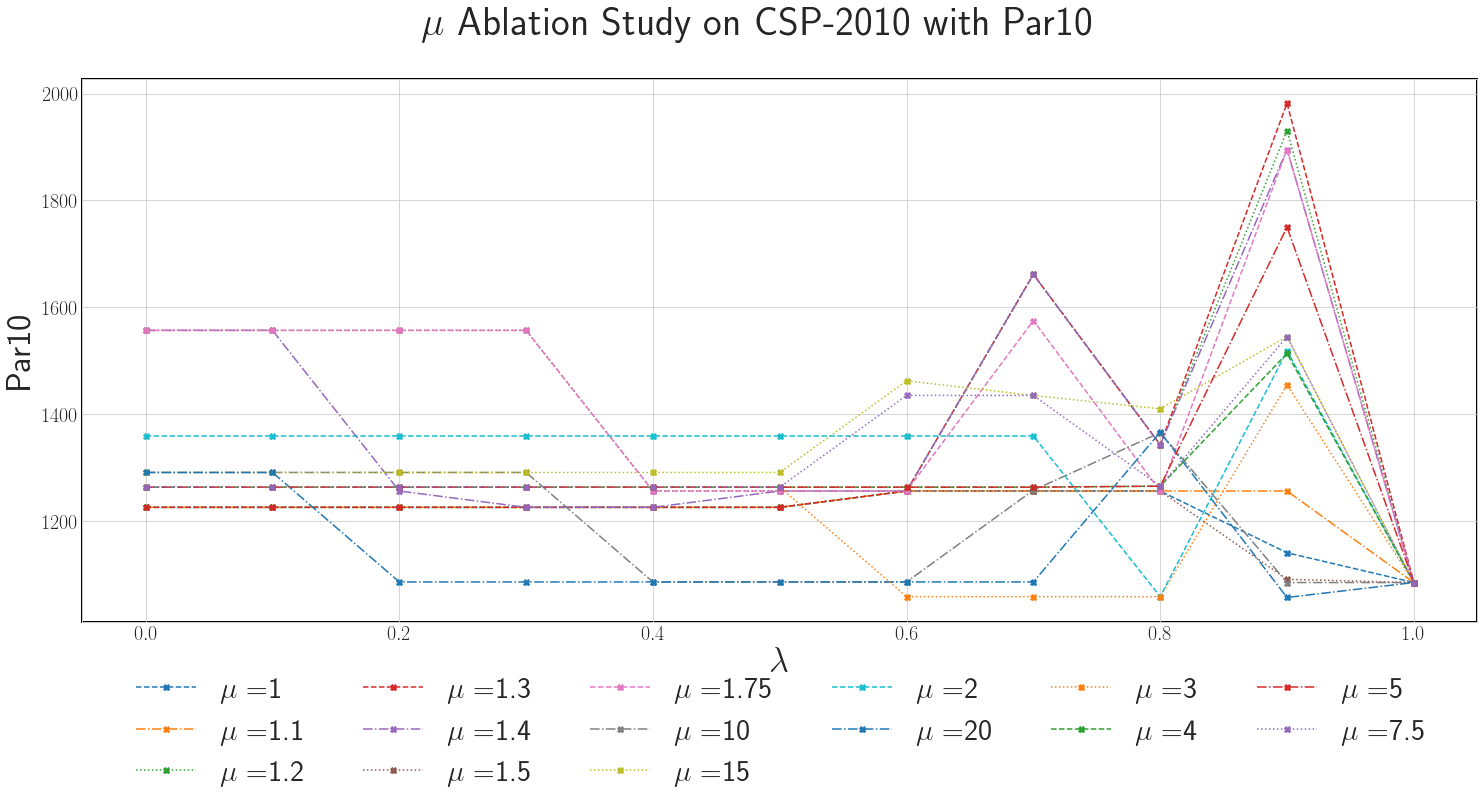

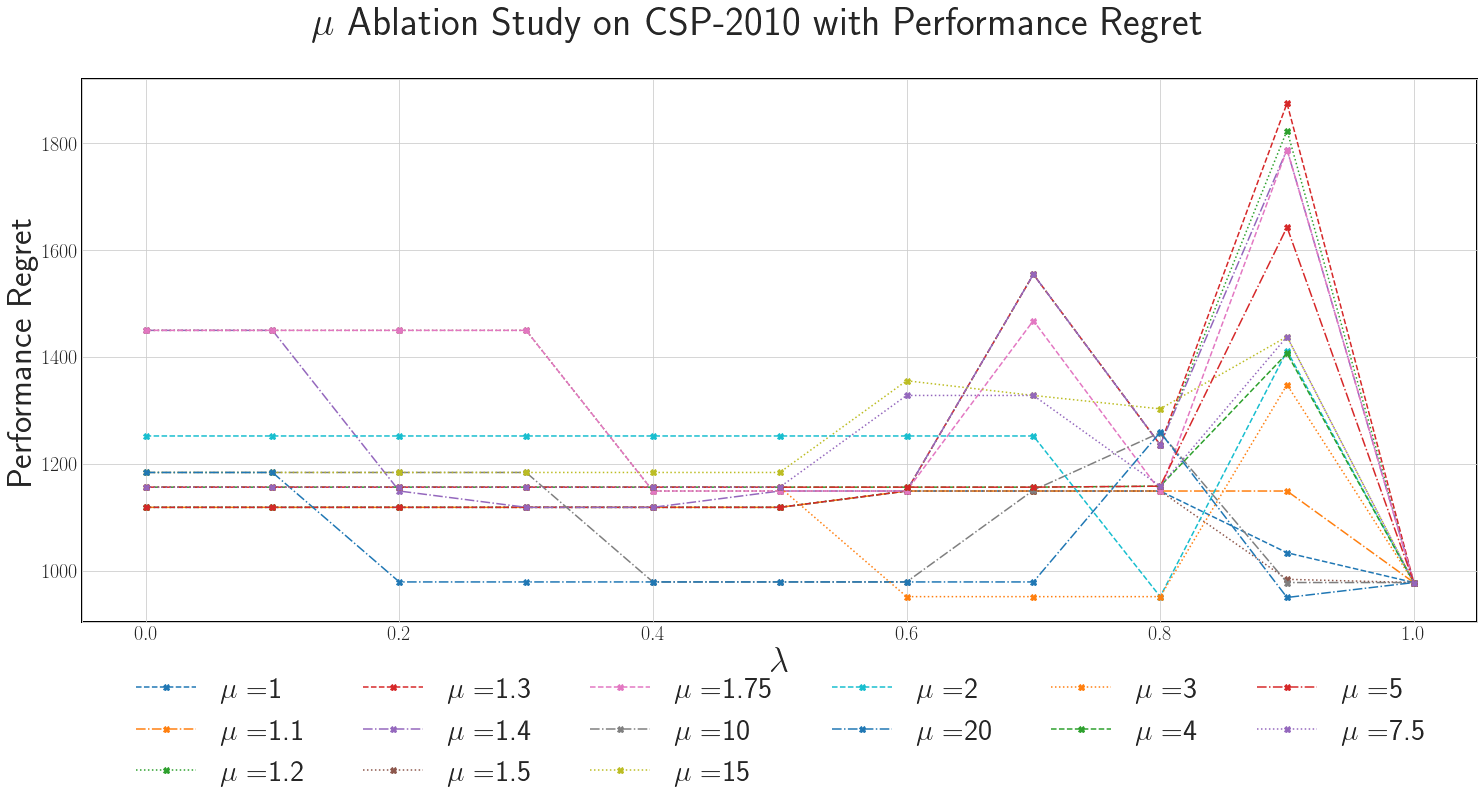

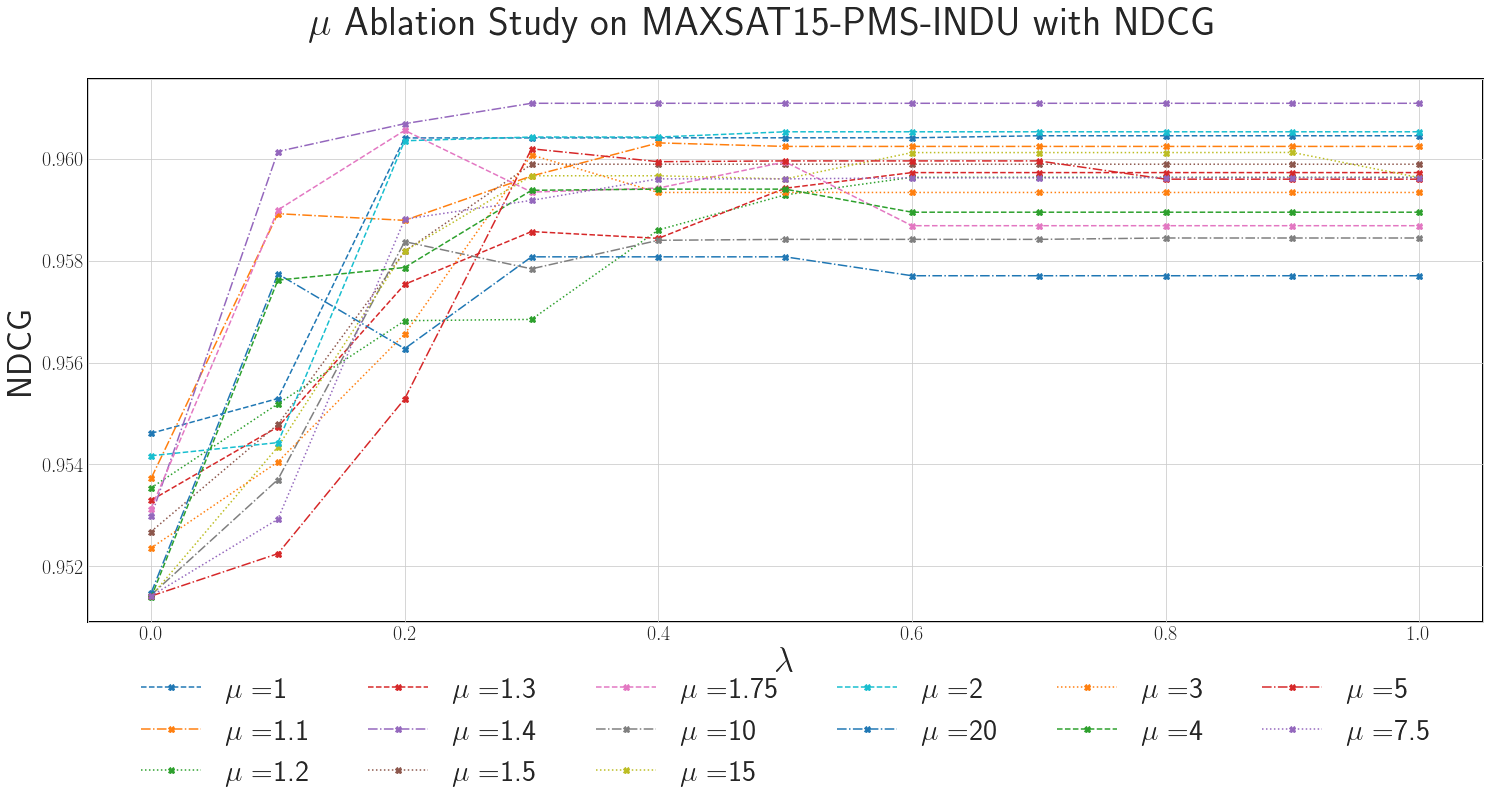

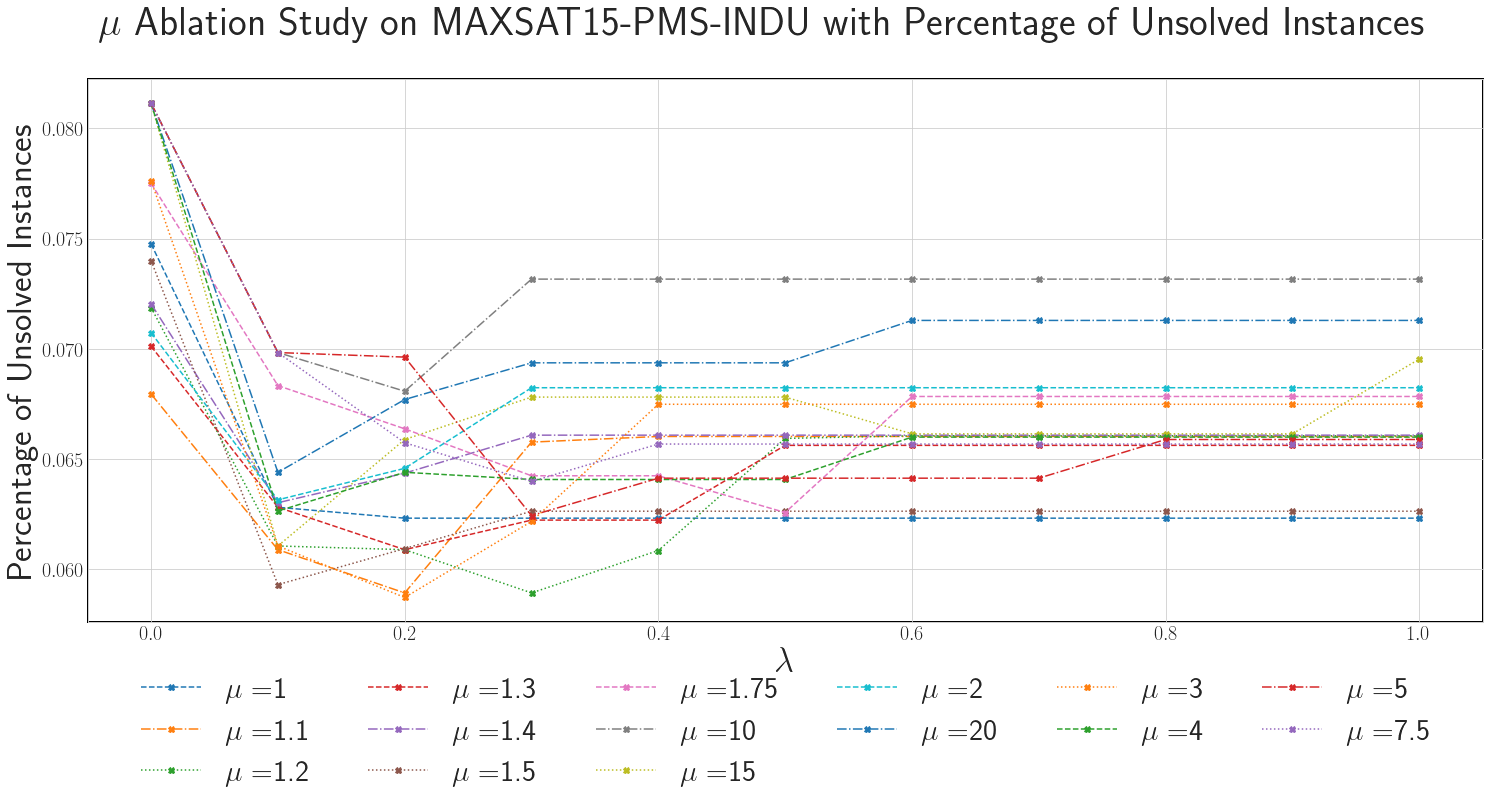

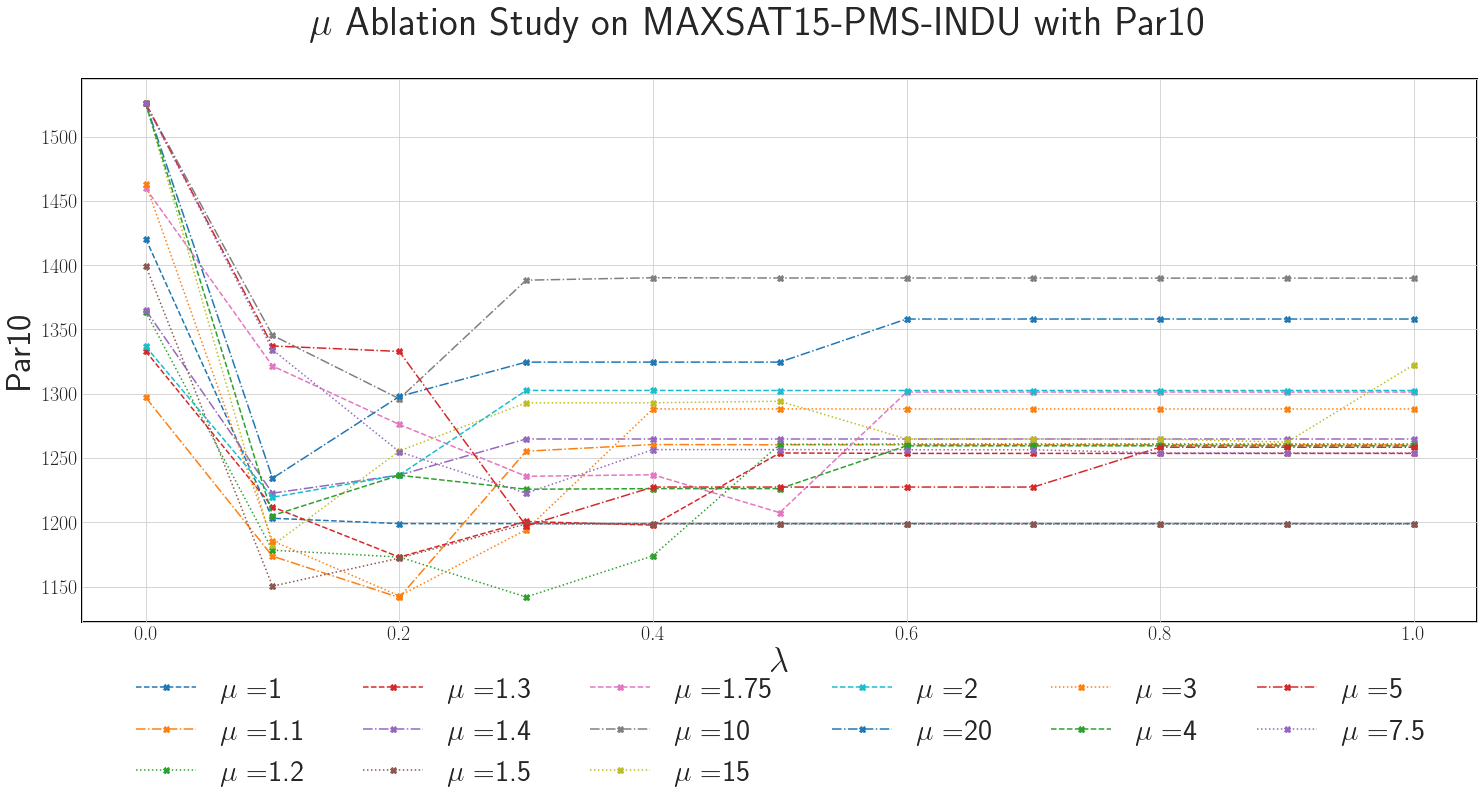

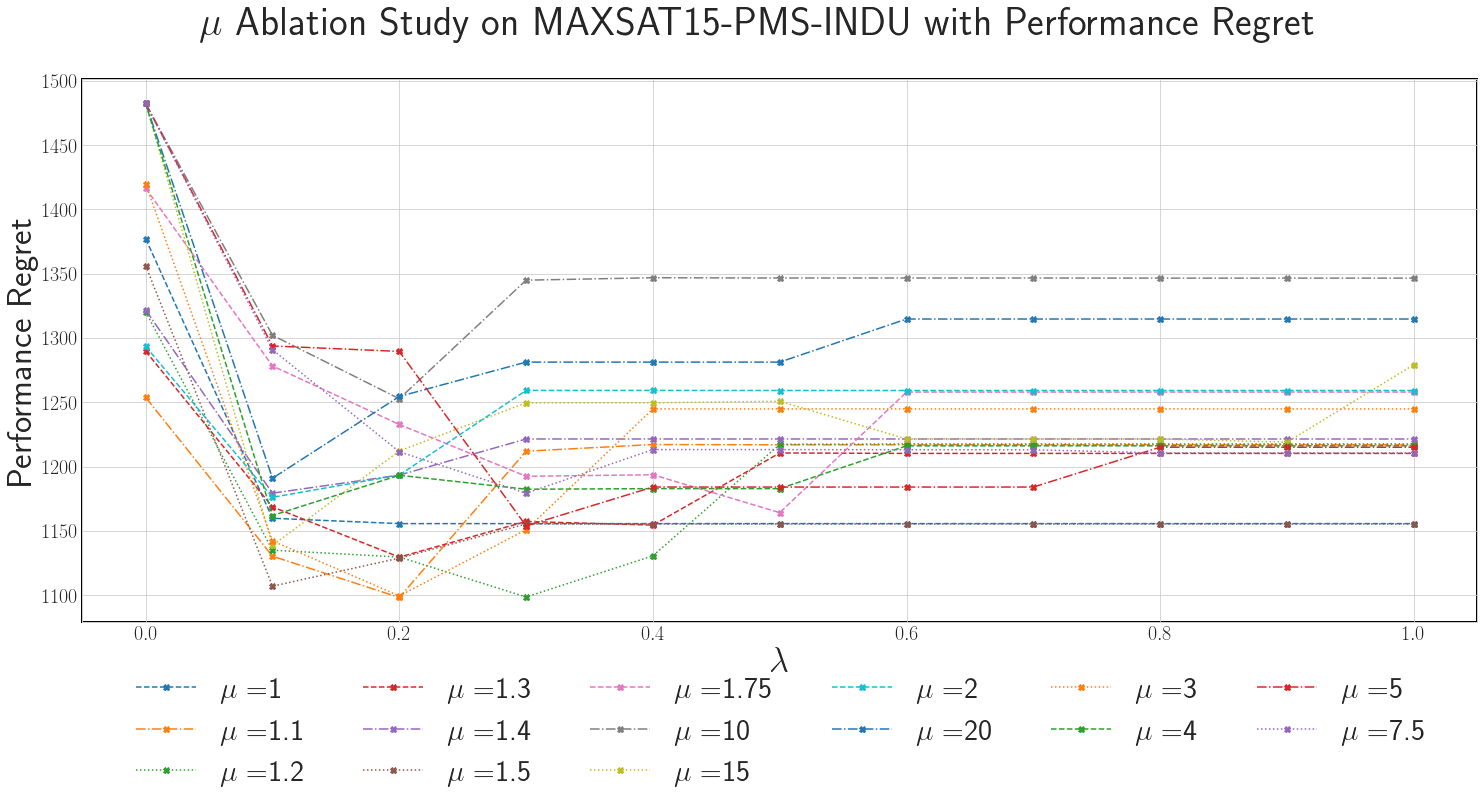

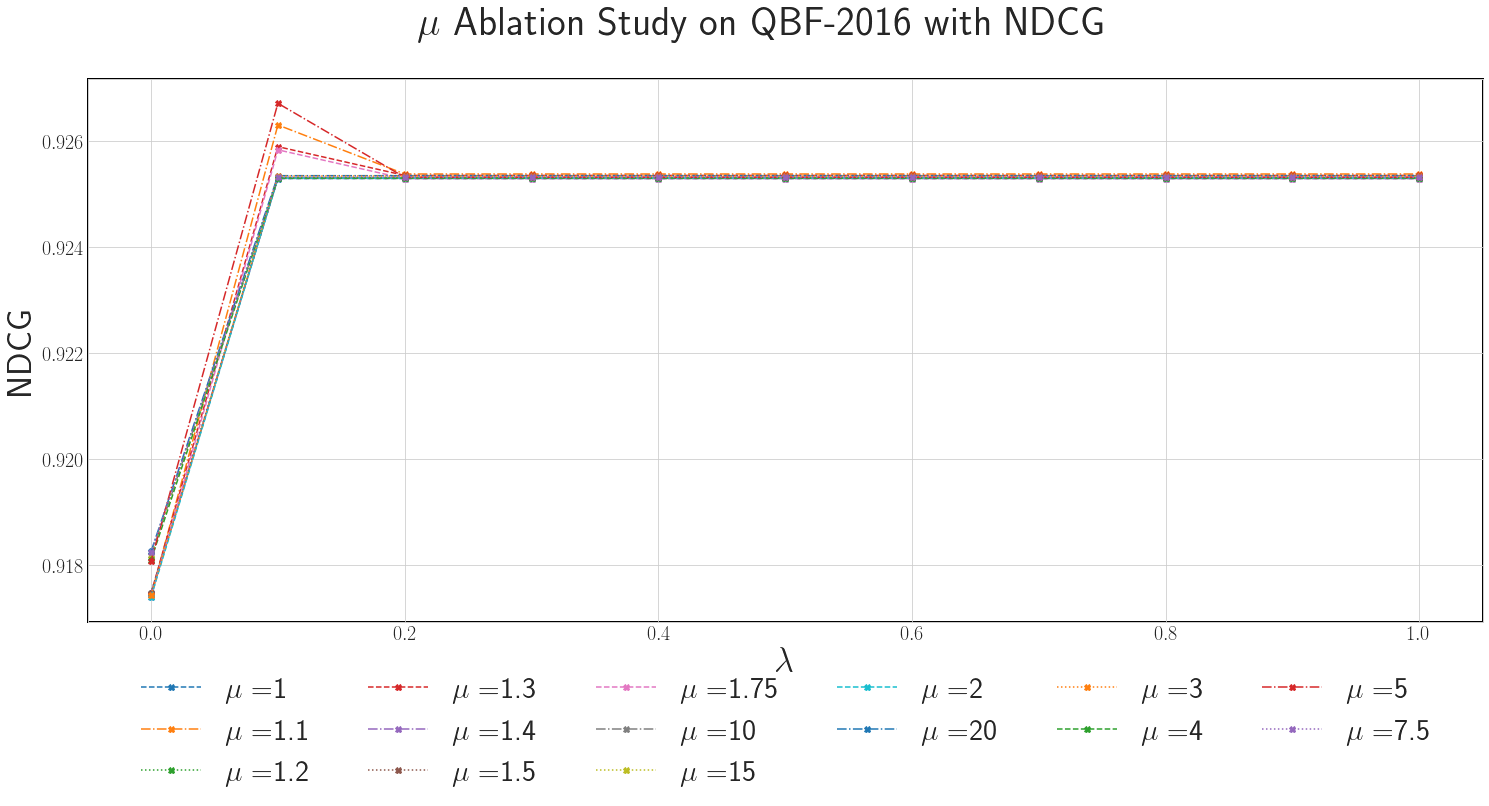

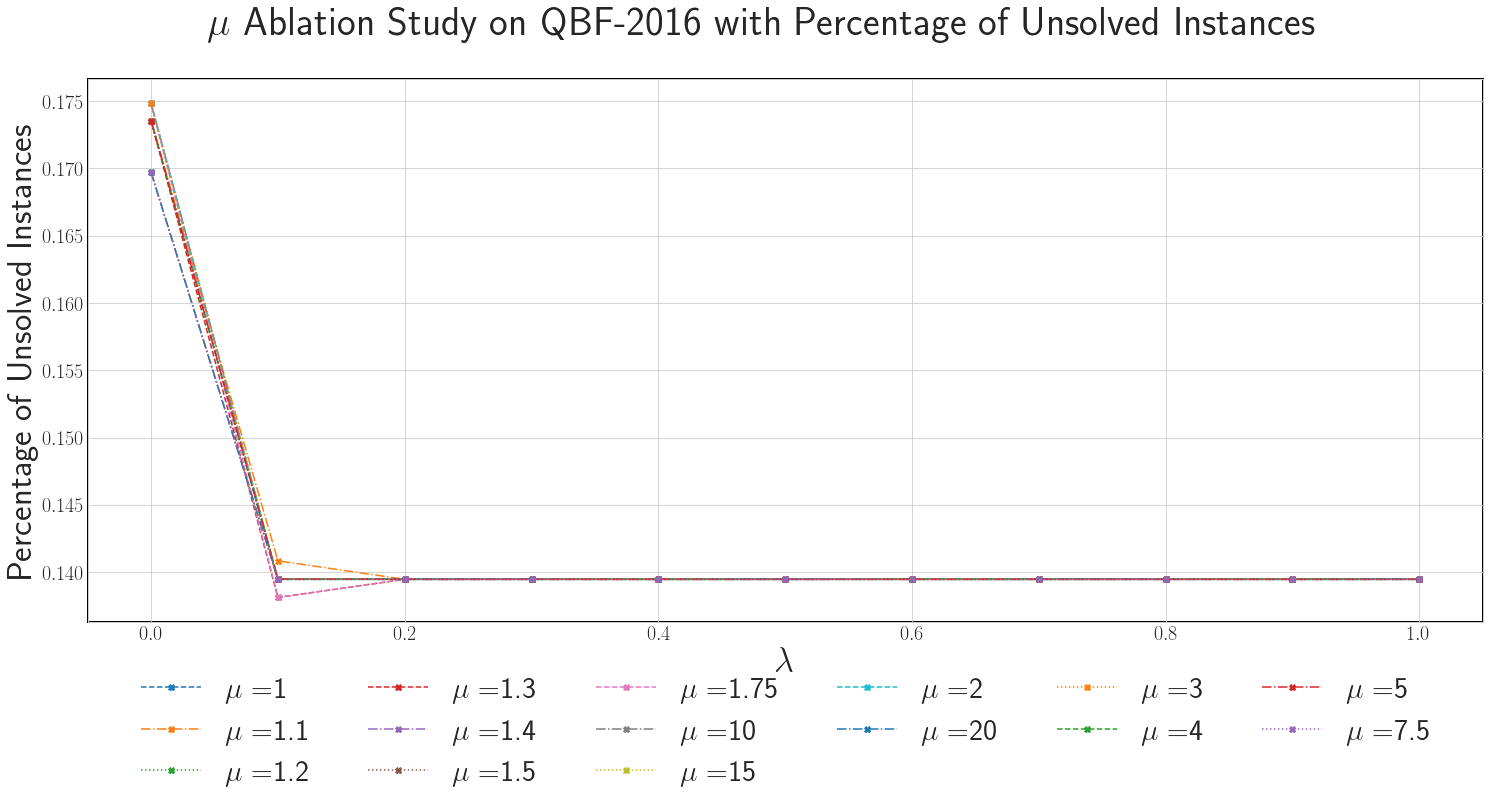

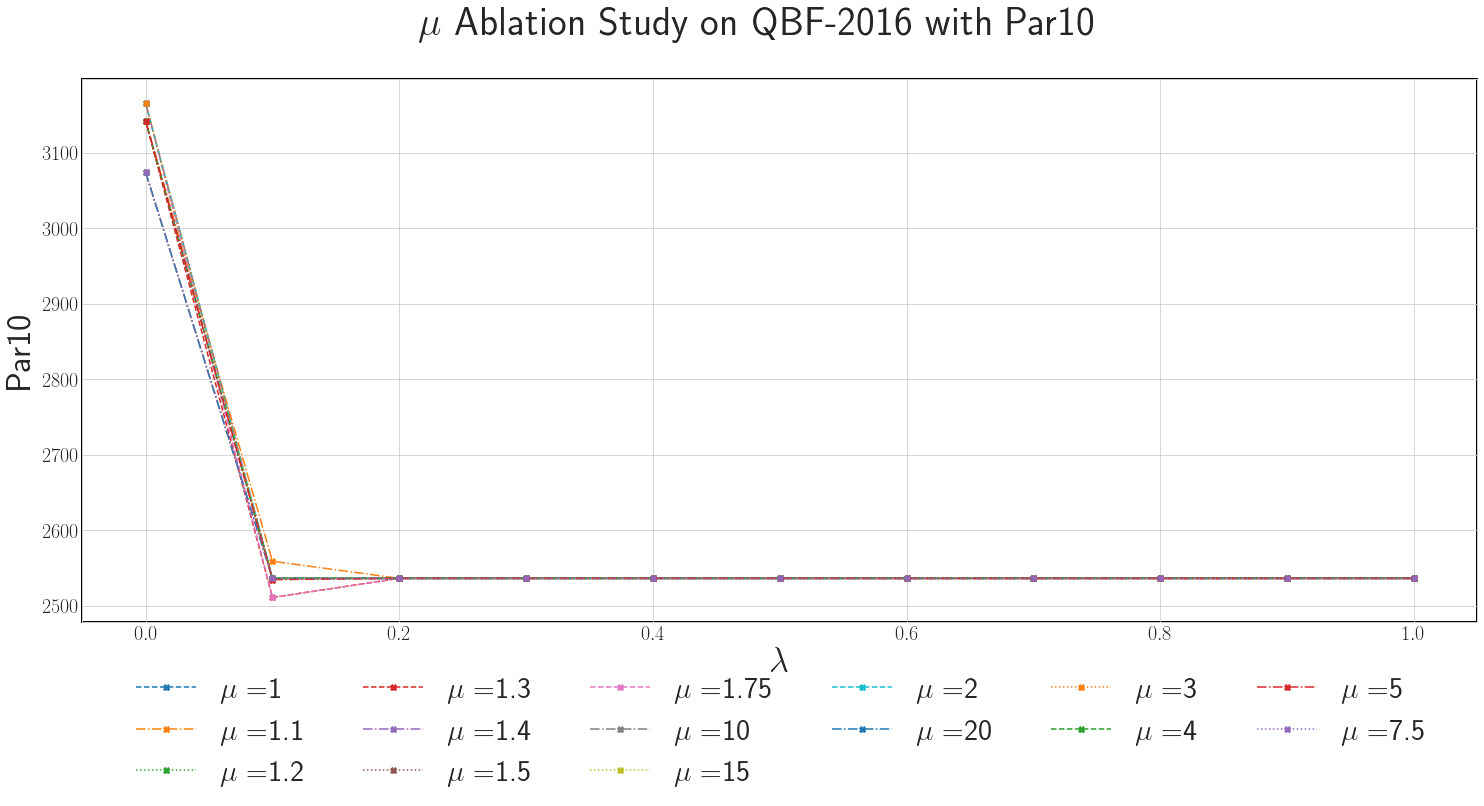

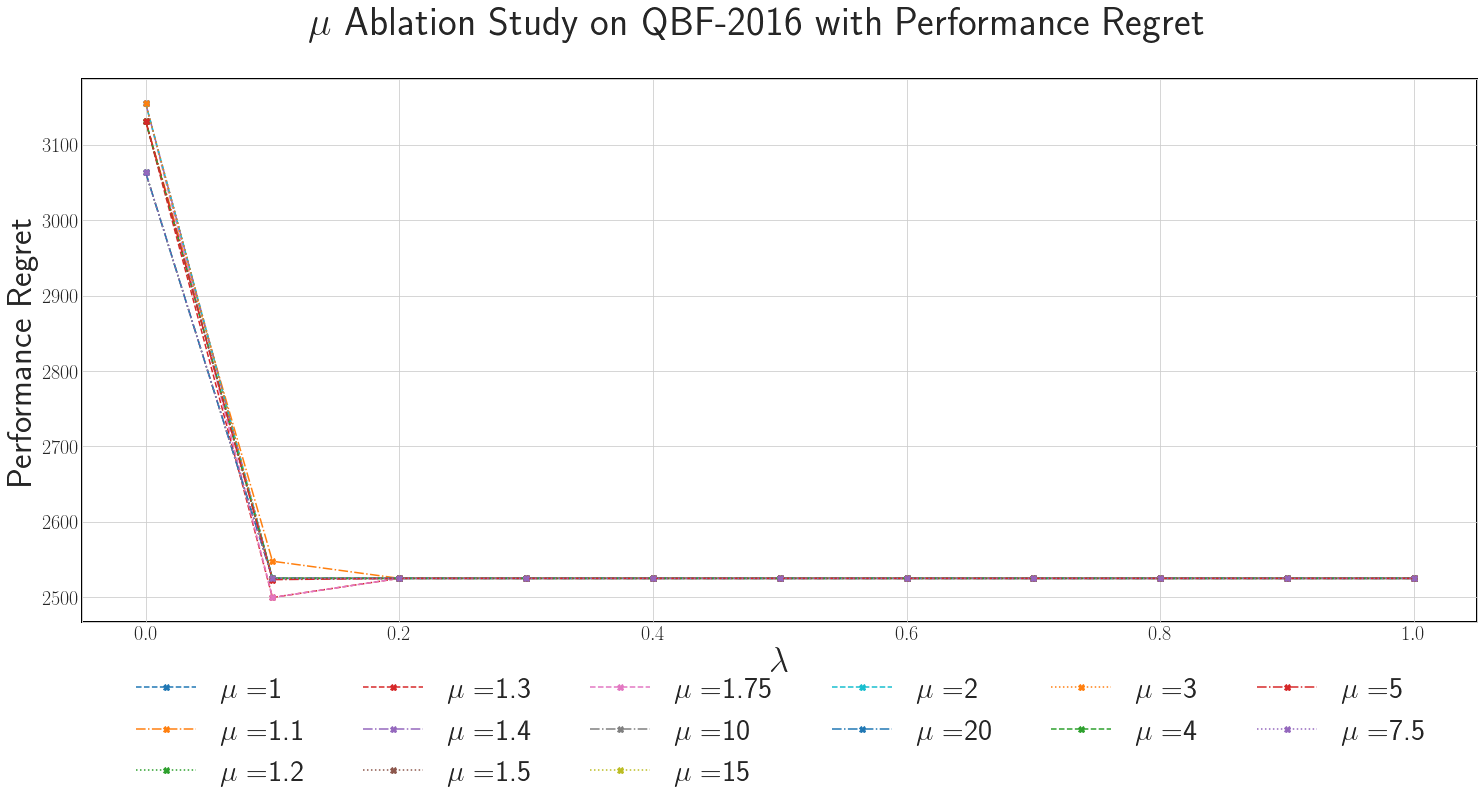

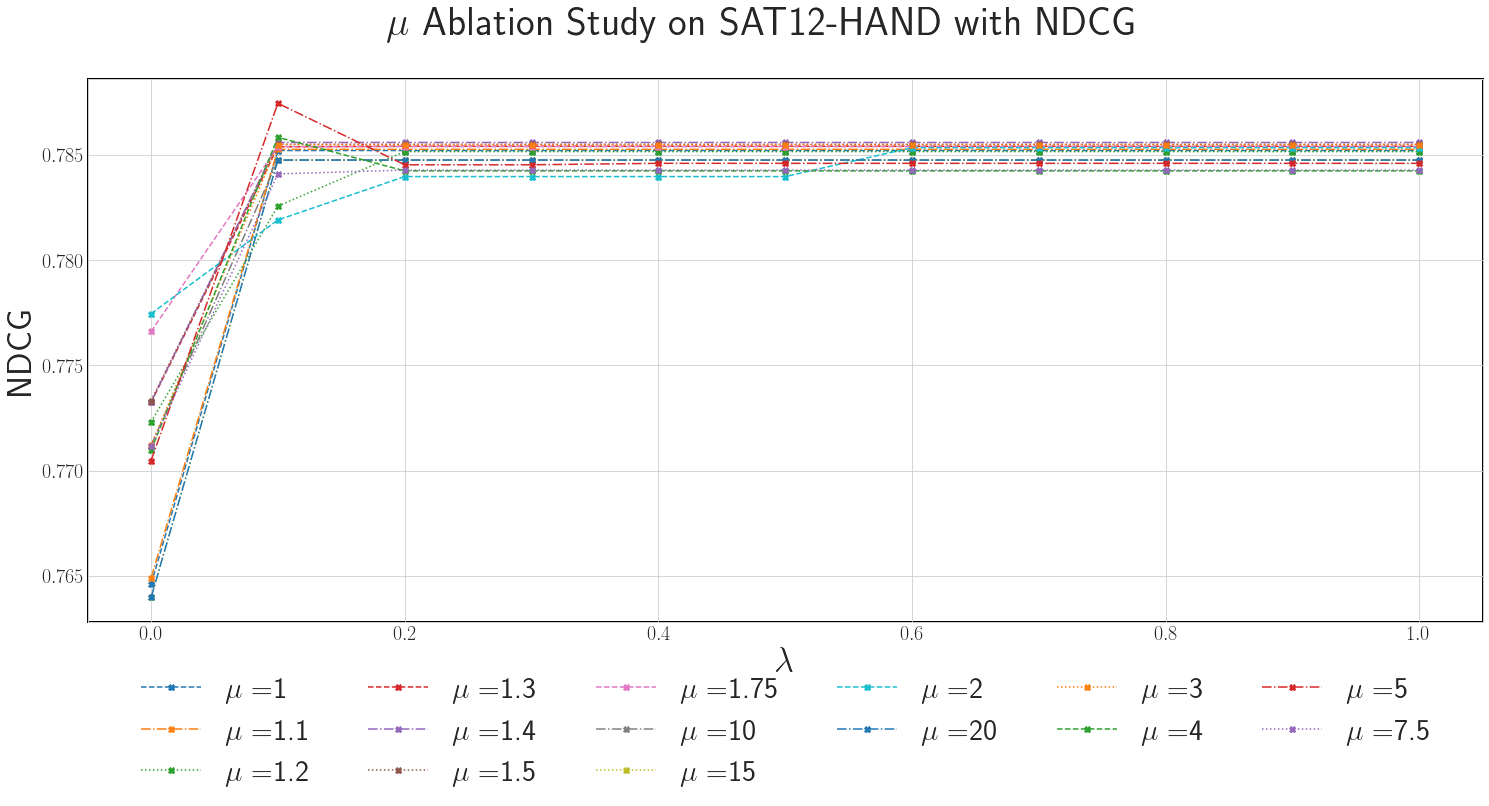

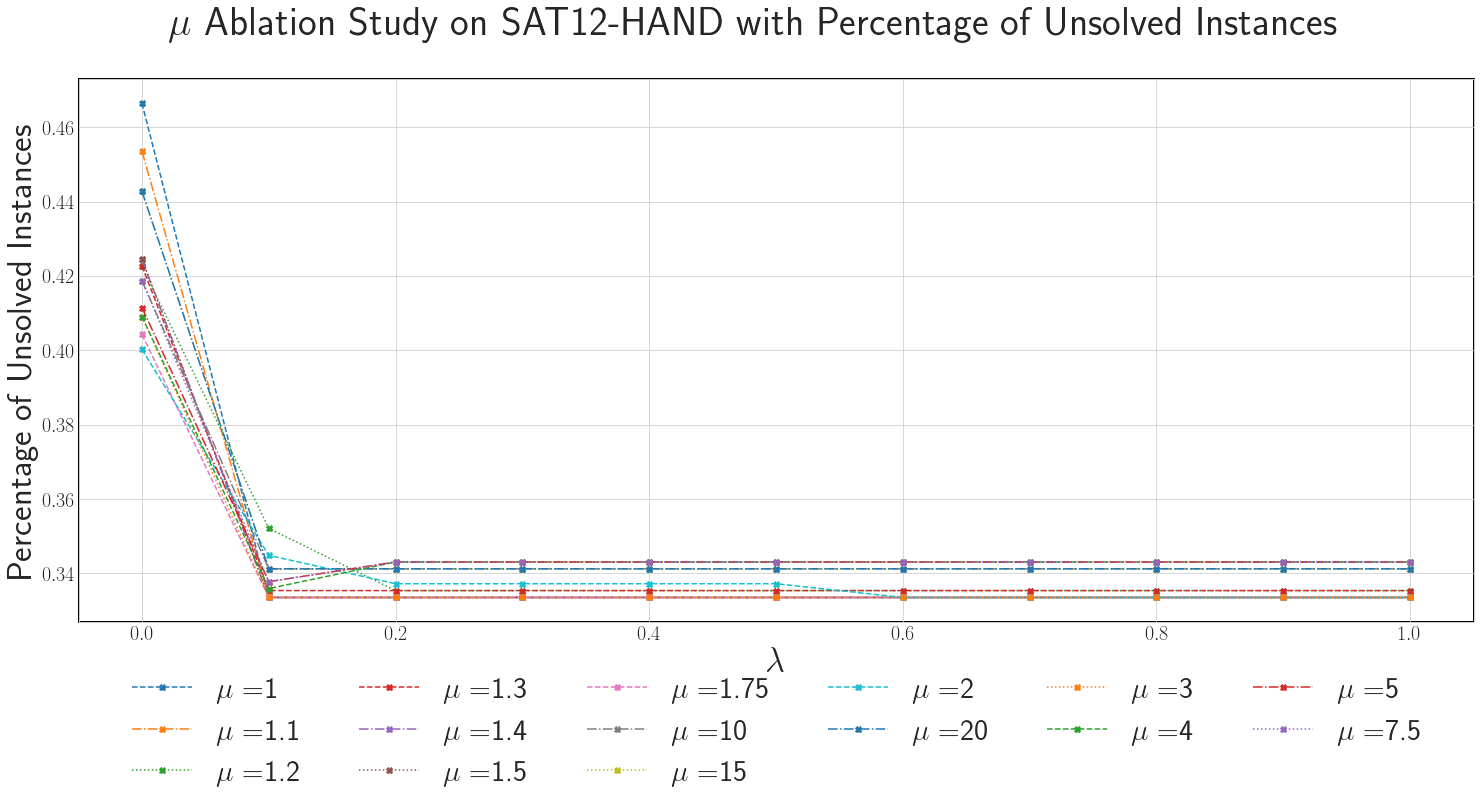

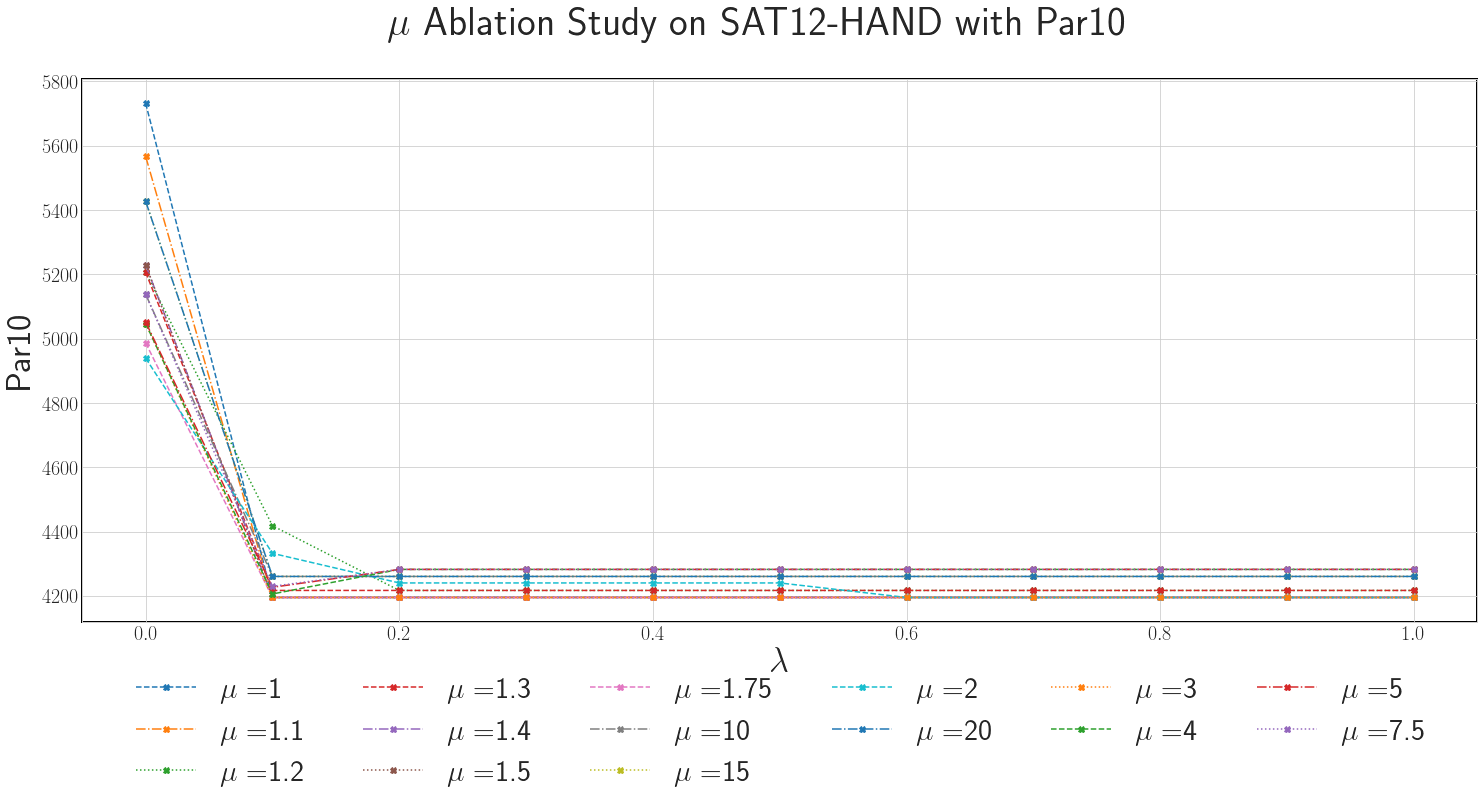

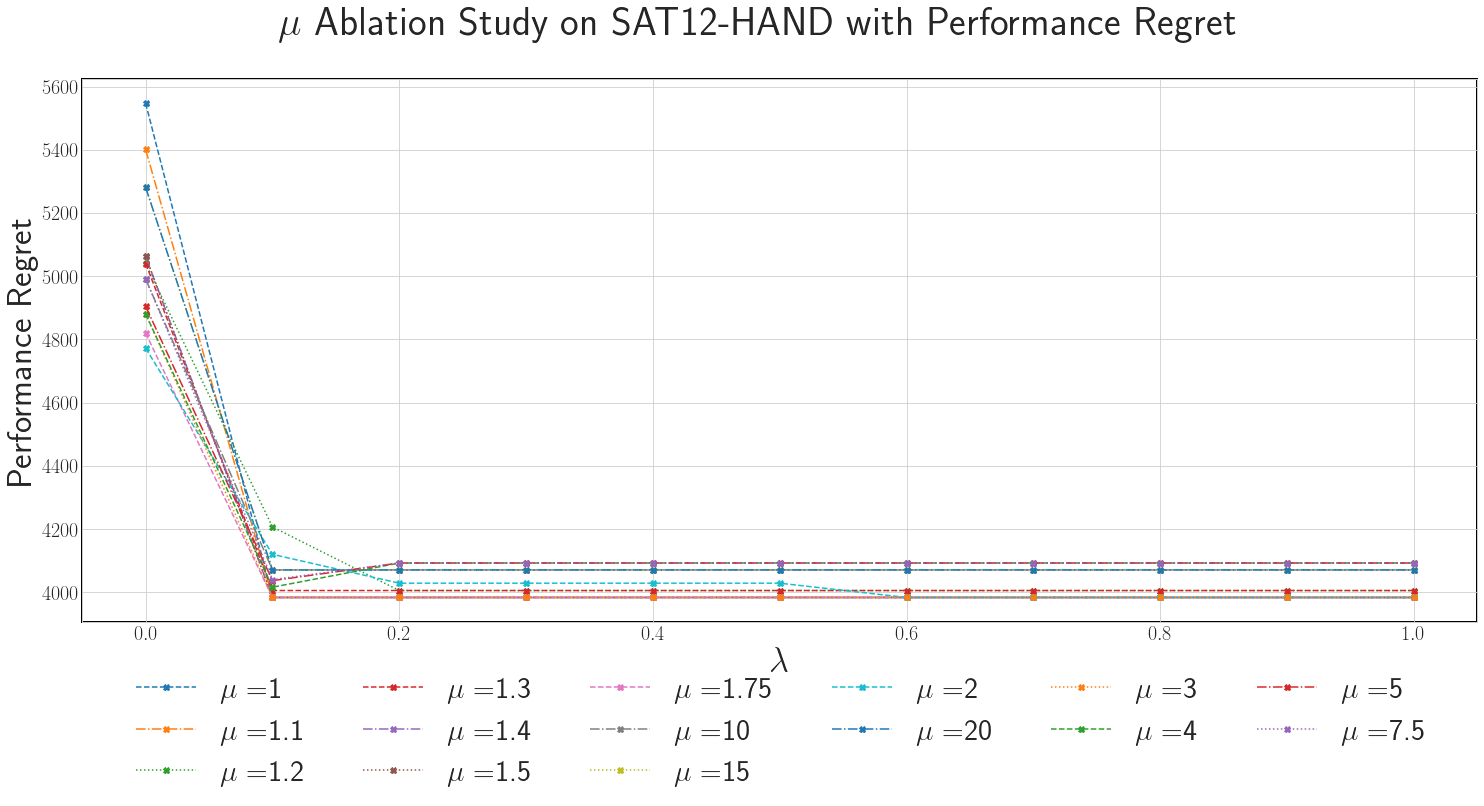

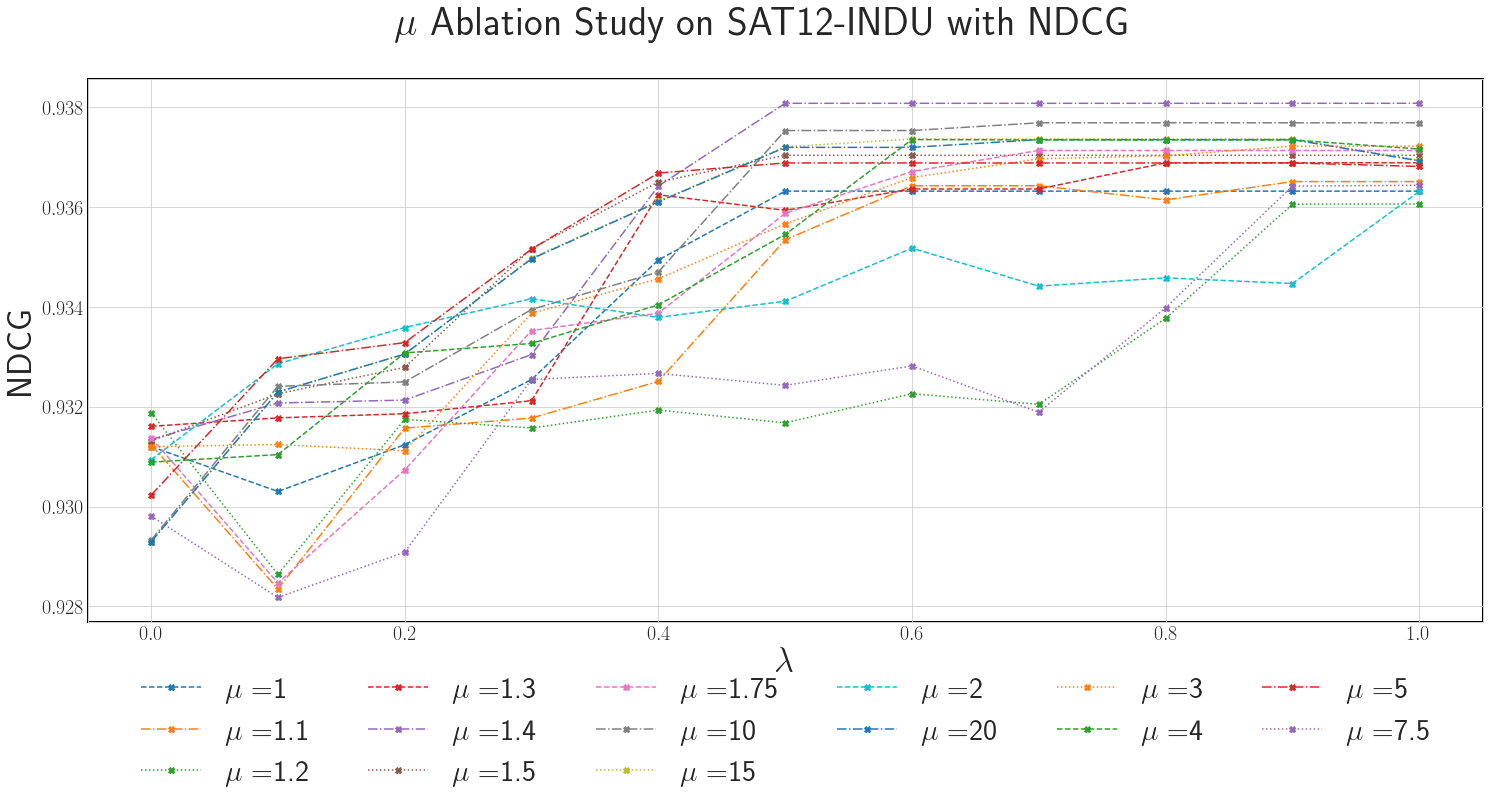

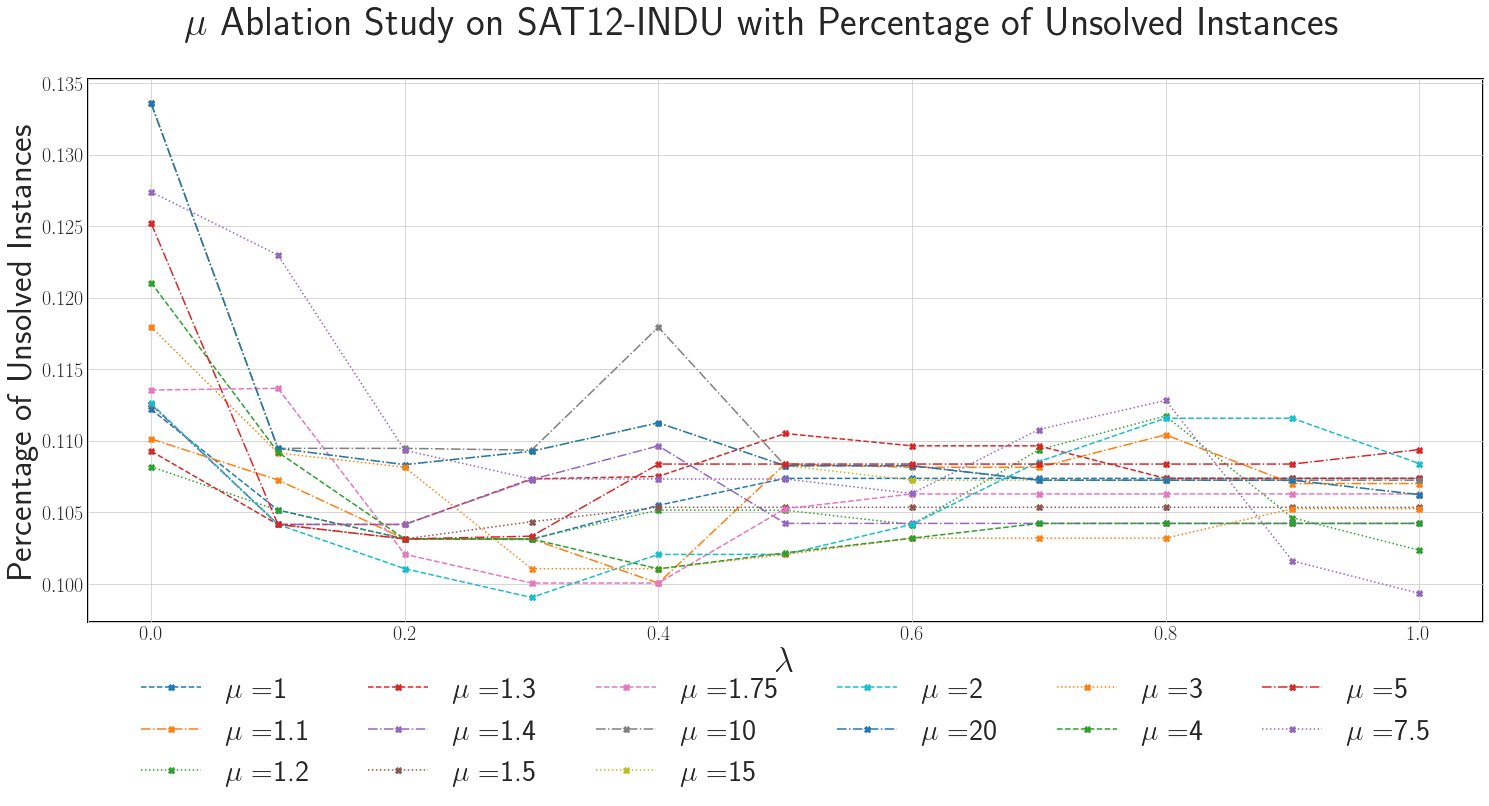

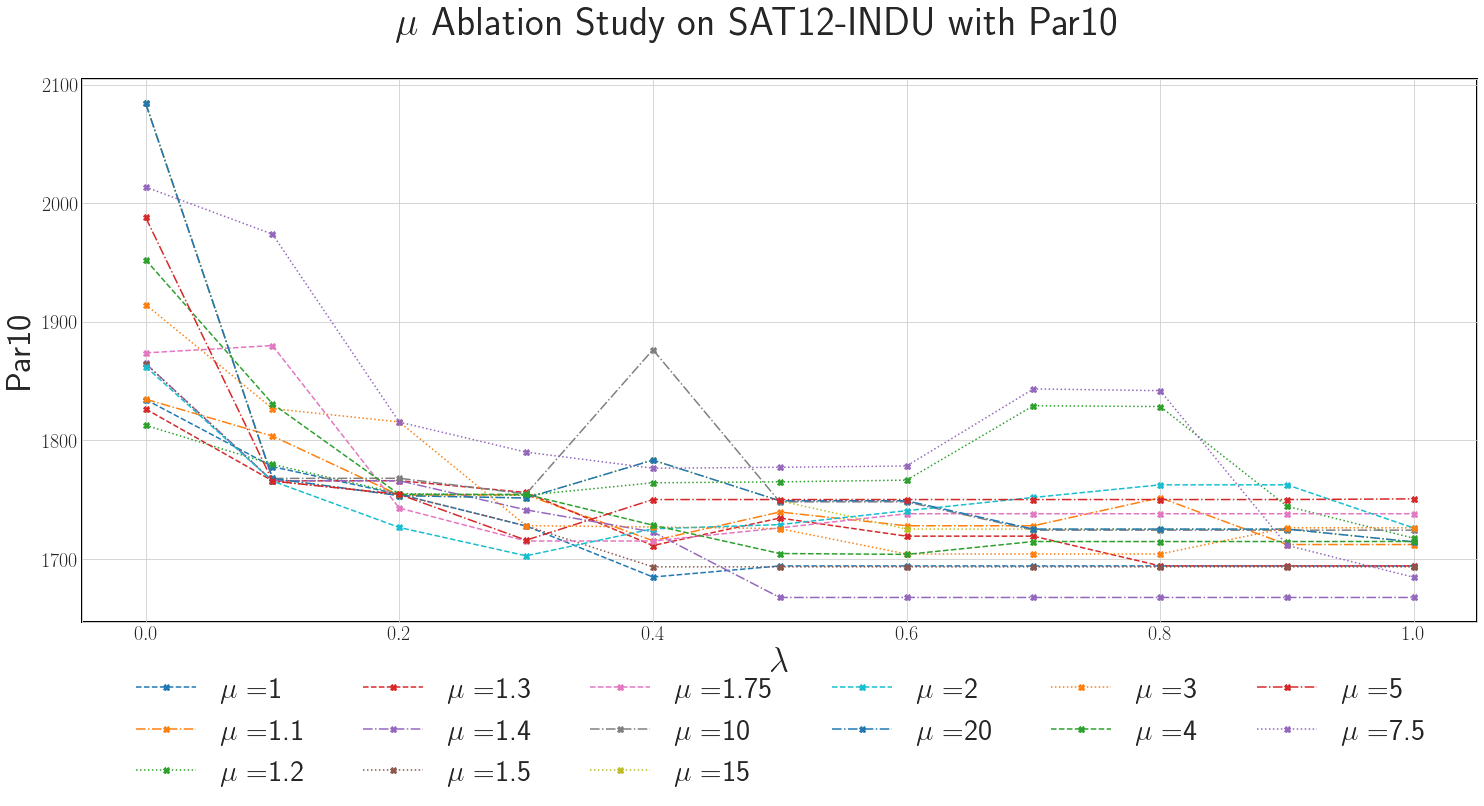

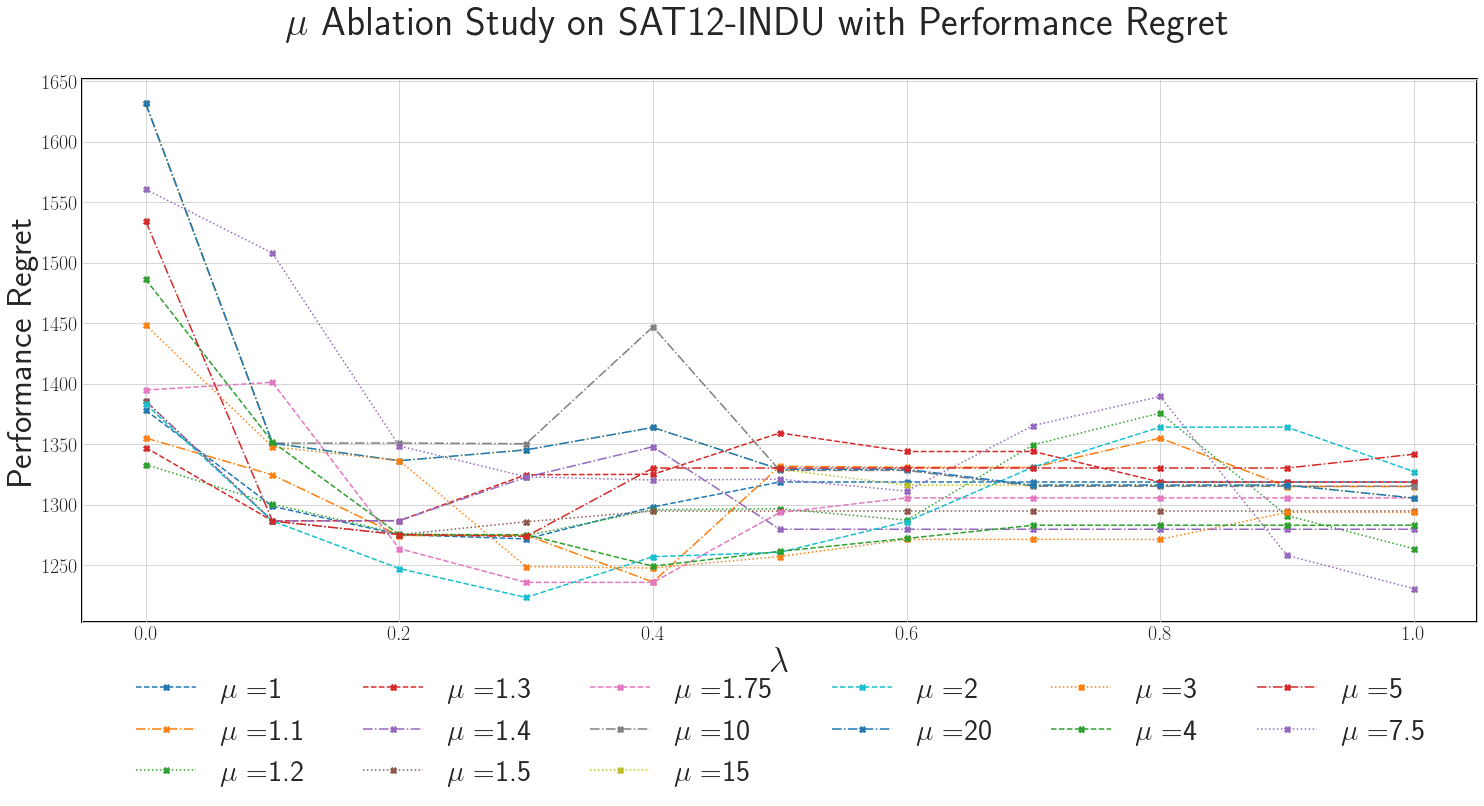

In [6]:
for scenario_name in df['scenario_name'].unique():
    for metric_number, metric in enumerate(df['metric'].unique()):
        fig, axs = plt.subplots()
        #tight_layout()
        
        if metric == 'par10':
            metric_name_graph = 'Par10'
        if metric == 'performanceRegret':
            metric_name_graph = 'Performance Regret'
        if metric == 'number_unsolved_instances_False':
            metric_name_graph = 'Percentage of Unsolved Instances'
        if metric == 'NDCG':
            metric_name_graph = 'NDCG'
        
        fig.suptitle(r"$\mu$ Ablation Study on " + scenario_name + " with " + metric_name_graph, fontsize=40)
        fig.set_size_inches(25, 10, forward=True)
        lables = [r"$\mu =$" + approach.split('_')[-1] for approach in df['approach'].unique()]
        line_types = ["--", "-.", ":"]
        for approach_number, approach in enumerate(df['approach'].unique()):
            data = df[(df['scenario_name'] == scenario_name) & (df['approach'] == approach) & (df['metric'] == metric)][['impact_factor', 'result']]
            axs.plot(data['impact_factor'], data['result'], "X" + line_types[approach_number%3], label=lables[approach_number],)
        axs.set_ylabel(metric_name_graph, fontsize=35)
        axs.set_xlabel(r"$\lambda$", fontsize=35)
        axs.patch.set_edgecolor("black")
        axs.patch.set_linewidth("2")
        axs.patch.set_edgecolor("black")
        axs.patch.set_linewidth("2")
        
        axs.tick_params(axis='both', which='major', labelsize=20)
        plt.legend(fontsize=30, loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)
        plt.savefig("value penalty comparison on " + scenario_name + " with " + metric + ".png", bbox_inches="tight")
        plt.show()
        